In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.randint(0, 10, 2)

array([7, 5])

In [180]:
x1 = range(1000)
x2 = range(1000, 2000)
y1 = np.asarray(x1) * 3 + np.random.randint(0, 10, len(x1)) / 10 * 15
y2 = np.asarray(x2) * 1 - np.random.randint(0, 10, len(x2)) / 10 * 20 

x = list(x1) + list(x2)

y = list(y1) + list(y2)

<AxesSubplot:xlabel='x'>

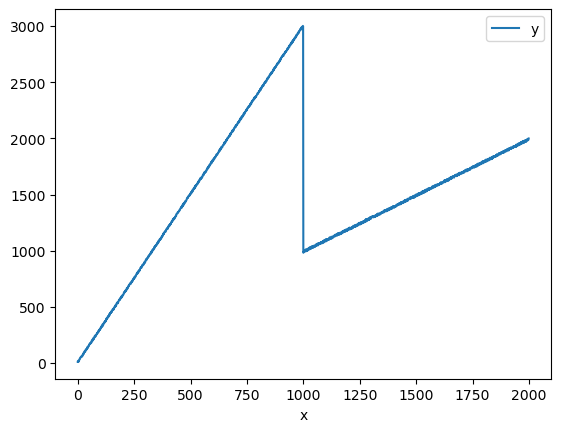

In [181]:
df = pd.DataFrame(np.c_[x, y], columns=['x', 'y'])
df['cat'] = ['a'] * len(x1) + ['b'] * len(x2)
df.set_index('x').plot()

In [182]:
df = df.sample(frac=1.0)
df

,x,y,cat
1099,1099.0,1097.0,b
589,589.0,1770.0,a
366,366.0,1105.5,a
1973,1973.0,1971.0,b
332,332.0,1008.0,a
...,...,...,...
703,703.0,2113.5,a
163,163.0,498.0,a
606,606.0,1818.0,a
1881,1881.0,1873.0,b


In [183]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(3, oov_token='<oov>')
tokenizer.fit_on_texts(['a', 'b'])
tokenizer.word_index
converted = tokenizer.texts_to_sequences(df.cat.tolist())

In [184]:
from tensorflow.keras.layers import Input, Dense, concatenate, Embedding, GlobalAveragePooling1D, Flatten, Normalization
from tensorflow.keras import Model, Sequential

In [185]:
num_input = Input(shape=(1, ))
cat_input = Input(shape=(1, ))

normalizer = Normalization(input_shape=[1,], axis=None)
normalizer.adapt(np.asarray(df.x))

model1 = Sequential([
                    Input(shape=(1, )),
                    #normalizer,
                    Dense(8, activation='relu')])

model2 = Sequential([Input(shape=(1, )), 
                    Embedding(input_dim=3, output_dim=4),
                    Flatten(),
                    #GlobalAveragePooling1D(),
                    Dense(8)])

output = concatenate([model1.output, model2.output])

output = Dense(1, activation='linear')(output)
model = Model(inputs=[model1.input, model2.input], outputs=output)

# x1 = Dense(4, activation='relu')(num_input)
# x2 = Embedding(3, 4)(cat_input)
# x2 = Flatten()(x2)
# x2 = Dense(4, activation='relu')(x2)
# out = concatenate([x1, x2])
# out = Dense(1)(out)
# model = Model(inputs=[num_input, cat_input], outputs=out)


# opt = tf.keras.optimizers.Adam(clipnorm=1, use_ema=True, ema_momentum=.99, learning_rate=0.001)
# opt = tf.keras.optimizers.SGD(clipnorm=1)

model.compile(loss='mse', optimizer='adam', metrics=['mape'])
input1 = np.asarray(df.x)[:, np.newaxis]
input2 = np.asarray(converted)[:, np.newaxis]
model.fit([input1, input2], np.asarray(df.y),  epochs=2000)


Epoch 1/2000
63/63 [==============================] - 1s 1ms/step - loss: 2857546.2500 - mape: 103.8278
Epoch 2/2000
63/63 [==============================] - 0s 1ms/step - loss: 2406475.5000 - mape: 94.6016
Epoch 3/2000
63/63 [==============================] - 0s 1ms/step - loss: 1978563.8750 - mape: 84.5973
Epoch 4/2000
63/63 [==============================] - 0s 1ms/step - loss: 1577470.0000 - mape: 73.7616
Epoch 5/2000
63/63 [==============================] - 0s 971us/step - loss: 1231637.5000 - mape: 62.4488
Epoch 6/2000
63/63 [==============================] - 0s 1ms/step - loss: 961383.1875 - mape: 51.3041
Epoch 7/2000
63/63 [==============================] - 0s 1ms/step - loss: 775658.5625 - mape: 40.8545
Epoch 8/2000
63/63 [==============================] - 0s 1ms/step - loss: 663570.3125 - mape: 33.5493
Epoch 9/2000
63/63 [==============================] - 0s 1ms/step - loss: 604688.3750 - mape: 34.9608
Epoch 10/2000
63/63 [==============================] - 0s 1ms/step - loss:

63/63 [==============================] - 0s 1ms/step - loss: 91837.7969 - mape: 61.5312
Epoch 81/2000
63/63 [==============================] - 0s 1ms/step - loss: 91477.4688 - mape: 61.1854
Epoch 82/2000
63/63 [==============================] - 0s 1ms/step - loss: 91095.6328 - mape: 60.7885
Epoch 83/2000
63/63 [==============================] - 0s 1ms/step - loss: 90562.8281 - mape: 60.6920
Epoch 84/2000
63/63 [==============================] - 0s 1ms/step - loss: 90508.2500 - mape: 60.5547
Epoch 85/2000
63/63 [==============================] - 0s 1ms/step - loss: 90028.0859 - mape: 60.3552
Epoch 86/2000
63/63 [==============================] - 0s 1ms/step - loss: 89687.1328 - mape: 60.0591
Epoch 87/2000
63/63 [==============================] - 0s 1ms/step - loss: 89472.8750 - mape: 59.5907
Epoch 88/2000
63/63 [==============================] - 0s 1ms/step - loss: 89170.7109 - mape: 59.5369
Epoch 89/2000
63/63 [==============================] - 0s 1ms/step - loss: 88812.2344 - mape: 59

63/63 [==============================] - 0s 1ms/step - loss: 83571.5234 - mape: 50.8999
Epoch 160/2000
63/63 [==============================] - 0s 1ms/step - loss: 83431.6406 - mape: 50.7861
Epoch 161/2000
63/63 [==============================] - 0s 1ms/step - loss: 83634.3125 - mape: 50.7106
Epoch 162/2000
63/63 [==============================] - 0s 1ms/step - loss: 83620.7266 - mape: 50.6751
Epoch 163/2000
63/63 [==============================] - 0s 1ms/step - loss: 83414.3047 - mape: 50.6612
Epoch 164/2000
63/63 [==============================] - 0s 1ms/step - loss: 83527.8906 - mape: 50.6887
Epoch 165/2000
63/63 [==============================] - 0s 1ms/step - loss: 83554.4141 - mape: 50.7483
Epoch 166/2000
63/63 [==============================] - 0s 1ms/step - loss: 83473.2500 - mape: 50.4229
Epoch 167/2000
63/63 [==============================] - 0s 1ms/step - loss: 83419.3359 - mape: 50.4135
Epoch 168/2000
63/63 [==============================] - 0s 1ms/step - loss: 83663.3203 -

63/63 [==============================] - 0s 1ms/step - loss: 83418.2578 - mape: 49.5475
Epoch 239/2000
63/63 [==============================] - 0s 999us/step - loss: 83529.3828 - mape: 49.7448
Epoch 240/2000
63/63 [==============================] - 0s 1ms/step - loss: 83395.8906 - mape: 49.7506
Epoch 241/2000
63/63 [==============================] - 0s 1ms/step - loss: 83411.6406 - mape: 49.8784
Epoch 242/2000
63/63 [==============================] - 0s 1ms/step - loss: 83342.1094 - mape: 49.6299
Epoch 243/2000
63/63 [==============================] - 0s 1ms/step - loss: 83328.8125 - mape: 49.8383
Epoch 244/2000
63/63 [==============================] - 0s 1ms/step - loss: 83461.2266 - mape: 49.5943
Epoch 245/2000
63/63 [==============================] - 0s 1ms/step - loss: 83404.5781 - mape: 49.9259
Epoch 246/2000
63/63 [==============================] - 0s 1ms/step - loss: 83497.8125 - mape: 49.8981
Epoch 247/2000
63/63 [==============================] - 0s 1ms/step - loss: 83551.4297

63/63 [==============================] - 0s 1ms/step - loss: 83570.6562 - mape: 49.9133
Epoch 318/2000
63/63 [==============================] - 0s 1ms/step - loss: 83378.4922 - mape: 49.5089
Epoch 319/2000
63/63 [==============================] - 0s 1ms/step - loss: 83530.6562 - mape: 49.8926
Epoch 320/2000
63/63 [==============================] - 0s 1ms/step - loss: 83385.8125 - mape: 49.6255
Epoch 321/2000
63/63 [==============================] - 0s 1ms/step - loss: 83489.5234 - mape: 49.7422
Epoch 322/2000
63/63 [==============================] - 0s 1ms/step - loss: 83365.4297 - mape: 49.7420
Epoch 323/2000
63/63 [==============================] - 0s 1ms/step - loss: 83450.7422 - mape: 49.5499
Epoch 324/2000
63/63 [==============================] - 0s 1ms/step - loss: 83409.6484 - mape: 49.7938
Epoch 325/2000
63/63 [==============================] - 0s 1ms/step - loss: 83493.6172 - mape: 49.5503
Epoch 326/2000
63/63 [==============================] - 0s 1ms/step - loss: 83447.7812 -

63/63 [==============================] - 0s 1ms/step - loss: 83498.3672 - mape: 49.5821
Epoch 397/2000
63/63 [==============================] - 0s 1ms/step - loss: 83344.2422 - mape: 49.6929
Epoch 398/2000
63/63 [==============================] - 0s 1ms/step - loss: 83411.7656 - mape: 49.6472
Epoch 399/2000
63/63 [==============================] - 0s 1ms/step - loss: 83301.6875 - mape: 49.8408
Epoch 400/2000
63/63 [==============================] - 0s 1ms/step - loss: 83495.6172 - mape: 49.7516
Epoch 401/2000
63/63 [==============================] - 0s 1ms/step - loss: 83442.0859 - mape: 49.8209
Epoch 402/2000
63/63 [==============================] - 0s 1ms/step - loss: 83440.8594 - mape: 49.6399
Epoch 403/2000
63/63 [==============================] - 0s 996us/step - loss: 83493.9453 - mape: 49.6145
Epoch 404/2000
63/63 [==============================] - 0s 983us/step - loss: 83446.6953 - mape: 49.8373
Epoch 405/2000
63/63 [==============================] - 0s 984us/step - loss: 83563.

63/63 [==============================] - 0s 1ms/step - loss: 83507.3281 - mape: 49.6854
Epoch 476/2000
63/63 [==============================] - 0s 1ms/step - loss: 83804.9766 - mape: 49.6098
Epoch 477/2000
63/63 [==============================] - 0s 1ms/step - loss: 83525.0391 - mape: 49.6712
Epoch 478/2000
63/63 [==============================] - 0s 1ms/step - loss: 83426.5625 - mape: 49.7655
Epoch 479/2000
63/63 [==============================] - 0s 1ms/step - loss: 83390.5469 - mape: 49.7156
Epoch 480/2000
63/63 [==============================] - 0s 1ms/step - loss: 83450.4922 - mape: 49.7790
Epoch 481/2000
63/63 [==============================] - 0s 1ms/step - loss: 83414.8281 - mape: 49.7315
Epoch 482/2000
63/63 [==============================] - 0s 1ms/step - loss: 83406.9297 - mape: 49.7085
Epoch 483/2000
63/63 [==============================] - 0s 1ms/step - loss: 83384.9297 - mape: 49.8333
Epoch 484/2000
63/63 [==============================] - 0s 1ms/step - loss: 83364.9219 -

63/63 [==============================] - 0s 1ms/step - loss: 83377.0469 - mape: 49.7733
Epoch 555/2000
63/63 [==============================] - 0s 1ms/step - loss: 83451.9609 - mape: 49.6463
Epoch 556/2000
63/63 [==============================] - 0s 1ms/step - loss: 83365.4531 - mape: 49.7260
Epoch 557/2000
63/63 [==============================] - 0s 998us/step - loss: 83396.6328 - mape: 49.8232
Epoch 558/2000
63/63 [==============================] - 0s 1ms/step - loss: 83534.0234 - mape: 49.7136
Epoch 559/2000
63/63 [==============================] - 0s 1ms/step - loss: 83362.8672 - mape: 49.6053
Epoch 560/2000
63/63 [==============================] - 0s 1ms/step - loss: 83332.5156 - mape: 49.7466
Epoch 561/2000
63/63 [==============================] - 0s 1ms/step - loss: 83372.2031 - mape: 49.7767
Epoch 562/2000
63/63 [==============================] - 0s 1ms/step - loss: 83325.3984 - mape: 49.6040
Epoch 563/2000
63/63 [==============================] - 0s 1ms/step - loss: 83340.1172

63/63 [==============================] - 0s 1ms/step - loss: 79985.9141 - mape: 47.9244
Epoch 634/2000
63/63 [==============================] - 0s 1ms/step - loss: 79913.3750 - mape: 47.9691
Epoch 635/2000
63/63 [==============================] - 0s 1ms/step - loss: 79742.9453 - mape: 47.7390
Epoch 636/2000
63/63 [==============================] - 0s 1ms/step - loss: 79603.0703 - mape: 47.7901
Epoch 637/2000
63/63 [==============================] - 0s 1ms/step - loss: 79618.5234 - mape: 47.8346
Epoch 638/2000
63/63 [==============================] - 0s 1ms/step - loss: 79519.8047 - mape: 47.7167
Epoch 639/2000
63/63 [==============================] - 0s 1ms/step - loss: 79432.2500 - mape: 47.7369
Epoch 640/2000
63/63 [==============================] - 0s 1ms/step - loss: 79315.0234 - mape: 47.7682
Epoch 641/2000
63/63 [==============================] - 0s 1ms/step - loss: 79261.3047 - mape: 47.4687
Epoch 642/2000
63/63 [==============================] - 0s 1ms/step - loss: 79340.6172 -

63/63 [==============================] - 0s 1ms/step - loss: 71938.2500 - mape: 44.3936
Epoch 713/2000
63/63 [==============================] - 0s 1ms/step - loss: 71978.2188 - mape: 44.6621
Epoch 714/2000
63/63 [==============================] - 0s 1ms/step - loss: 71679.9141 - mape: 44.5995
Epoch 715/2000
63/63 [==============================] - 0s 1ms/step - loss: 71651.4609 - mape: 44.4790
Epoch 716/2000
63/63 [==============================] - 0s 1ms/step - loss: 71501.8828 - mape: 44.3205
Epoch 717/2000
63/63 [==============================] - 0s 1ms/step - loss: 71386.7500 - mape: 44.2473
Epoch 718/2000
63/63 [==============================] - 0s 1ms/step - loss: 71200.1406 - mape: 44.3607
Epoch 719/2000
63/63 [==============================] - 0s 1ms/step - loss: 71147.8984 - mape: 44.2908
Epoch 720/2000
63/63 [==============================] - 0s 1ms/step - loss: 70969.7969 - mape: 44.1851
Epoch 721/2000
63/63 [==============================] - 0s 1ms/step - loss: 70989.8203 -

63/63 [==============================] - 0s 1ms/step - loss: 61086.0352 - mape: 39.9790
Epoch 792/2000
63/63 [==============================] - 0s 1ms/step - loss: 61054.9023 - mape: 40.0804
Epoch 793/2000
63/63 [==============================] - 0s 1ms/step - loss: 60835.3477 - mape: 39.9439
Epoch 794/2000
63/63 [==============================] - 0s 1ms/step - loss: 60878.3125 - mape: 39.6847
Epoch 795/2000
63/63 [==============================] - 0s 1ms/step - loss: 60680.7930 - mape: 39.8182
Epoch 796/2000
63/63 [==============================] - 0s 2ms/step - loss: 60467.7812 - mape: 39.7633
Epoch 797/2000
63/63 [==============================] - 0s 961us/step - loss: 60272.4648 - mape: 39.6891
Epoch 798/2000
63/63 [==============================] - 0s 960us/step - loss: 60105.8086 - mape: 39.6826
Epoch 799/2000
63/63 [==============================] - 0s 994us/step - loss: 59943.8438 - mape: 39.4469
Epoch 800/2000
63/63 [==============================] - 0s 1ms/step - loss: 59808.

63/63 [==============================] - 0s 1ms/step - loss: 48614.6094 - mape: 34.4749
Epoch 871/2000
63/63 [==============================] - 0s 1ms/step - loss: 48441.2188 - mape: 34.2614
Epoch 872/2000
63/63 [==============================] - 0s 1ms/step - loss: 48212.1250 - mape: 34.2339
Epoch 873/2000
63/63 [==============================] - 0s 1ms/step - loss: 48050.0859 - mape: 34.1976
Epoch 874/2000
63/63 [==============================] - 0s 1ms/step - loss: 47828.7070 - mape: 33.8979
Epoch 875/2000
63/63 [==============================] - 0s 1ms/step - loss: 47812.0742 - mape: 34.0502
Epoch 876/2000
63/63 [==============================] - 0s 1ms/step - loss: 47754.4219 - mape: 34.1059
Epoch 877/2000
63/63 [==============================] - 0s 1ms/step - loss: 47488.1719 - mape: 33.8528
Epoch 878/2000
63/63 [==============================] - 0s 1ms/step - loss: 47278.0273 - mape: 33.8871
Epoch 879/2000
63/63 [==============================] - 0s 1ms/step - loss: 47214.7266 -

63/63 [==============================] - 0s 1ms/step - loss: 35378.9492 - mape: 28.0596
Epoch 950/2000
63/63 [==============================] - 0s 1ms/step - loss: 35327.4453 - mape: 27.9432
Epoch 951/2000
63/63 [==============================] - 0s 1ms/step - loss: 35049.2148 - mape: 27.8124
Epoch 952/2000
63/63 [==============================] - 0s 1ms/step - loss: 34863.5938 - mape: 27.5993
Epoch 953/2000
63/63 [==============================] - 0s 1ms/step - loss: 34748.3828 - mape: 27.5788
Epoch 954/2000
63/63 [==============================] - 0s 1ms/step - loss: 34566.1172 - mape: 27.5381
Epoch 955/2000
63/63 [==============================] - 0s 1ms/step - loss: 34439.7070 - mape: 27.2731
Epoch 956/2000
63/63 [==============================] - 0s 1ms/step - loss: 34228.3125 - mape: 27.4780
Epoch 957/2000
63/63 [==============================] - 0s 1ms/step - loss: 34046.6797 - mape: 27.0907
Epoch 958/2000
63/63 [==============================] - 0s 1ms/step - loss: 33920.8711 -

63/63 [==============================] - 0s 3ms/step - loss: 22794.5605 - mape: 21.0569
Epoch 1029/2000
63/63 [==============================] - 0s 3ms/step - loss: 22761.4844 - mape: 21.1033
Epoch 1030/2000
63/63 [==============================] - 0s 1ms/step - loss: 22573.1621 - mape: 21.0087
Epoch 1031/2000
63/63 [==============================] - 0s 1ms/step - loss: 22402.6973 - mape: 20.7946
Epoch 1032/2000
63/63 [==============================] - 0s 1ms/step - loss: 22269.5625 - mape: 20.9856
Epoch 1033/2000
63/63 [==============================] - 0s 1ms/step - loss: 22045.5996 - mape: 20.4656
Epoch 1034/2000
63/63 [==============================] - 0s 1ms/step - loss: 22012.1367 - mape: 20.2242
Epoch 1035/2000
63/63 [==============================] - 0s 2ms/step - loss: 21876.0098 - mape: 20.3447
Epoch 1036/2000
63/63 [==============================] - 0s 1ms/step - loss: 21616.2891 - mape: 20.3938
Epoch 1037/2000
63/63 [==============================] - 0s 1ms/step - loss: 214

63/63 [==============================] - 0s 1ms/step - loss: 12296.0566 - mape: 14.4071
Epoch 1107/2000
63/63 [==============================] - 0s 1ms/step - loss: 12172.7969 - mape: 13.9448
Epoch 1108/2000
63/63 [==============================] - 0s 1ms/step - loss: 12054.5742 - mape: 14.2029
Epoch 1109/2000
63/63 [==============================] - 0s 1ms/step - loss: 11904.9600 - mape: 13.8889
Epoch 1110/2000
63/63 [==============================] - 0s 1ms/step - loss: 11817.0713 - mape: 14.0164
Epoch 1111/2000
63/63 [==============================] - 0s 1ms/step - loss: 11728.0840 - mape: 14.0336
Epoch 1112/2000
63/63 [==============================] - 0s 1ms/step - loss: 11525.0762 - mape: 13.5296
Epoch 1113/2000
63/63 [==============================] - 0s 1ms/step - loss: 11513.8193 - mape: 13.8606
Epoch 1114/2000
63/63 [==============================] - 0s 2ms/step - loss: 11392.4590 - mape: 13.6063
Epoch 1115/2000
63/63 [==============================] - 0s 1ms/step - loss: 112

63/63 [==============================] - 0s 1ms/step - loss: 4590.6724 - mape: 7.9943
Epoch 1186/2000
63/63 [==============================] - 0s 1ms/step - loss: 4575.0601 - mape: 7.9160
Epoch 1187/2000
63/63 [==============================] - 0s 1ms/step - loss: 4522.8120 - mape: 8.3089
Epoch 1188/2000
63/63 [==============================] - 0s 1ms/step - loss: 4410.0684 - mape: 7.5020
Epoch 1189/2000
63/63 [==============================] - 0s 1ms/step - loss: 4321.3081 - mape: 7.8626
Epoch 1190/2000
63/63 [==============================] - 0s 1ms/step - loss: 4234.1172 - mape: 7.6132
Epoch 1191/2000
63/63 [==============================] - 0s 1ms/step - loss: 4188.3545 - mape: 7.6650
Epoch 1192/2000
63/63 [==============================] - 0s 1ms/step - loss: 4092.3975 - mape: 7.4656
Epoch 1193/2000
63/63 [==============================] - 0s 1ms/step - loss: 4042.7229 - mape: 7.3415
Epoch 1194/2000
63/63 [==============================] - 0s 1ms/step - loss: 3971.9451 - mape: 7.2

63/63 [==============================] - 0s 1ms/step - loss: 756.8059 - mape: 2.8889
Epoch 1266/2000
63/63 [==============================] - 0s 1ms/step - loss: 723.0757 - mape: 2.7936
Epoch 1267/2000
63/63 [==============================] - 0s 1ms/step - loss: 696.7798 - mape: 2.6674
Epoch 1268/2000
63/63 [==============================] - 0s 1ms/step - loss: 686.7960 - mape: 2.7937
Epoch 1269/2000
63/63 [==============================] - 0s 1ms/step - loss: 656.9038 - mape: 2.6469
Epoch 1270/2000
63/63 [==============================] - 0s 1ms/step - loss: 645.2919 - mape: 2.6629
Epoch 1271/2000
63/63 [==============================] - 0s 1ms/step - loss: 616.5098 - mape: 2.7588
Epoch 1272/2000
63/63 [==============================] - 0s 1ms/step - loss: 605.7443 - mape: 2.5040
Epoch 1273/2000
63/63 [==============================] - 0s 1ms/step - loss: 584.7904 - mape: 2.4241
Epoch 1274/2000
63/63 [==============================] - 0s 1ms/step - loss: 564.3565 - mape: 2.6061
Epoch 

63/63 [==============================] - 0s 1ms/step - loss: 42.1336 - mape: 0.6225
Epoch 1347/2000
63/63 [==============================] - 0s 1ms/step - loss: 41.5166 - mape: 0.6056
Epoch 1348/2000
63/63 [==============================] - 0s 1ms/step - loss: 43.0055 - mape: 0.6057
Epoch 1349/2000
63/63 [==============================] - 0s 1ms/step - loss: 43.6401 - mape: 0.5914
Epoch 1350/2000
63/63 [==============================] - 0s 1ms/step - loss: 43.3437 - mape: 0.6179
Epoch 1351/2000
63/63 [==============================] - 0s 1ms/step - loss: 37.3017 - mape: 0.5700
Epoch 1352/2000
63/63 [==============================] - 0s 1ms/step - loss: 39.4619 - mape: 0.6051
Epoch 1353/2000
63/63 [==============================] - 0s 1ms/step - loss: 37.1184 - mape: 0.5945
Epoch 1354/2000
63/63 [==============================] - 0s 1ms/step - loss: 39.7543 - mape: 0.5937
Epoch 1355/2000
63/63 [==============================] - 0s 1ms/step - loss: 42.3302 - mape: 0.5995
Epoch 1356/2000


63/63 [==============================] - 0s 1ms/step - loss: 32.1281 - mape: 0.5773
Epoch 1429/2000
63/63 [==============================] - 0s 1ms/step - loss: 34.8825 - mape: 0.5807
Epoch 1430/2000
63/63 [==============================] - 0s 1ms/step - loss: 33.6824 - mape: 0.5735
Epoch 1431/2000
63/63 [==============================] - 0s 1ms/step - loss: 32.0464 - mape: 0.5801
Epoch 1432/2000
63/63 [==============================] - 0s 1ms/step - loss: 30.8183 - mape: 0.5734
Epoch 1433/2000
63/63 [==============================] - 0s 1ms/step - loss: 33.2280 - mape: 0.5784
Epoch 1434/2000
63/63 [==============================] - 0s 1ms/step - loss: 35.3974 - mape: 0.5891
Epoch 1435/2000
63/63 [==============================] - 0s 1ms/step - loss: 30.6143 - mape: 0.5680
Epoch 1436/2000
63/63 [==============================] - 0s 1ms/step - loss: 28.2165 - mape: 0.5567
Epoch 1437/2000
63/63 [==============================] - 0s 1ms/step - loss: 30.6854 - mape: 0.5679
Epoch 1438/2000


63/63 [==============================] - 0s 1ms/step - loss: 31.3501 - mape: 0.5845
Epoch 1511/2000
63/63 [==============================] - 0s 1ms/step - loss: 28.2692 - mape: 0.5550
Epoch 1512/2000
63/63 [==============================] - 0s 1ms/step - loss: 30.0806 - mape: 0.5725
Epoch 1513/2000
63/63 [==============================] - 0s 1ms/step - loss: 30.5817 - mape: 0.5771
Epoch 1514/2000
63/63 [==============================] - 0s 1ms/step - loss: 42.5610 - mape: 0.6150
Epoch 1515/2000
63/63 [==============================] - 0s 1ms/step - loss: 31.7869 - mape: 0.5698
Epoch 1516/2000
63/63 [==============================] - 0s 1ms/step - loss: 36.0301 - mape: 0.5831
Epoch 1517/2000
63/63 [==============================] - 0s 1ms/step - loss: 39.3519 - mape: 0.5980
Epoch 1518/2000
63/63 [==============================] - 0s 3ms/step - loss: 35.7292 - mape: 0.5817
Epoch 1519/2000
63/63 [==============================] - 0s 2ms/step - loss: 29.2798 - mape: 0.5713
Epoch 1520/2000


63/63 [==============================] - 0s 1ms/step - loss: 37.0682 - mape: 0.6006
Epoch 1593/2000
63/63 [==============================] - 0s 1ms/step - loss: 29.5556 - mape: 0.5632
Epoch 1594/2000
63/63 [==============================] - 0s 1ms/step - loss: 29.3432 - mape: 0.5717
Epoch 1595/2000
63/63 [==============================] - 0s 1ms/step - loss: 33.1910 - mape: 0.5826
Epoch 1596/2000
63/63 [==============================] - 0s 1ms/step - loss: 28.4901 - mape: 0.5679
Epoch 1597/2000
63/63 [==============================] - 0s 1ms/step - loss: 32.0636 - mape: 0.5768
Epoch 1598/2000
63/63 [==============================] - 0s 1ms/step - loss: 31.0066 - mape: 0.5799
Epoch 1599/2000
63/63 [==============================] - 0s 1ms/step - loss: 30.1532 - mape: 0.5711
Epoch 1600/2000
63/63 [==============================] - 0s 1ms/step - loss: 30.4240 - mape: 0.5789
Epoch 1601/2000
63/63 [==============================] - 0s 1ms/step - loss: 33.4309 - mape: 0.5886
Epoch 1602/2000


Epoch 1674/2000
63/63 [==============================] - 0s 1ms/step - loss: 31.1713 - mape: 0.5691
Epoch 1675/2000
63/63 [==============================] - 0s 1ms/step - loss: 37.7012 - mape: 0.5900
Epoch 1676/2000
63/63 [==============================] - 0s 1ms/step - loss: 29.0903 - mape: 0.5633
Epoch 1677/2000
63/63 [==============================] - 0s 1ms/step - loss: 34.2793 - mape: 0.5894
Epoch 1678/2000
63/63 [==============================] - 0s 1ms/step - loss: 36.3526 - mape: 0.6075
Epoch 1679/2000
63/63 [==============================] - 0s 1ms/step - loss: 27.8927 - mape: 0.5648
Epoch 1680/2000
63/63 [==============================] - 0s 1ms/step - loss: 33.9737 - mape: 0.5787
Epoch 1681/2000
63/63 [==============================] - 0s 1ms/step - loss: 28.6936 - mape: 0.5613
Epoch 1682/2000
63/63 [==============================] - 0s 1ms/step - loss: 32.7288 - mape: 0.5863
Epoch 1683/2000
63/63 [==============================] - 0s 1ms/step - loss: 29.0902 - mape: 0.5733


63/63 [==============================] - 0s 1ms/step - loss: 33.0118 - mape: 0.5808
Epoch 1756/2000
63/63 [==============================] - 0s 1ms/step - loss: 29.9164 - mape: 0.5720
Epoch 1757/2000
63/63 [==============================] - 0s 1ms/step - loss: 28.4496 - mape: 0.5599
Epoch 1758/2000
63/63 [==============================] - 0s 1ms/step - loss: 31.7440 - mape: 0.5890
Epoch 1759/2000
63/63 [==============================] - 0s 1ms/step - loss: 31.9375 - mape: 0.5823
Epoch 1760/2000
63/63 [==============================] - 0s 1ms/step - loss: 31.9143 - mape: 0.5780
Epoch 1761/2000
63/63 [==============================] - 0s 1ms/step - loss: 28.2430 - mape: 0.5671
Epoch 1762/2000
63/63 [==============================] - 0s 1ms/step - loss: 33.8318 - mape: 0.5884
Epoch 1763/2000
63/63 [==============================] - 0s 1ms/step - loss: 28.9411 - mape: 0.5636
Epoch 1764/2000
63/63 [==============================] - 0s 1ms/step - loss: 28.2165 - mape: 0.5655
Epoch 1765/2000


63/63 [==============================] - 0s 1ms/step - loss: 29.5366 - mape: 0.5642
Epoch 1838/2000
63/63 [==============================] - 0s 1ms/step - loss: 32.4063 - mape: 0.5777
Epoch 1839/2000
63/63 [==============================] - 0s 1ms/step - loss: 32.8112 - mape: 0.5819
Epoch 1840/2000
63/63 [==============================] - 0s 1ms/step - loss: 30.3499 - mape: 0.5763
Epoch 1841/2000
63/63 [==============================] - 0s 1ms/step - loss: 29.6697 - mape: 0.5694
Epoch 1842/2000
63/63 [==============================] - 0s 1ms/step - loss: 32.6227 - mape: 0.5754
Epoch 1843/2000
63/63 [==============================] - 0s 1ms/step - loss: 34.2211 - mape: 0.5834
Epoch 1844/2000
63/63 [==============================] - 0s 1ms/step - loss: 30.3554 - mape: 0.5755
Epoch 1845/2000
63/63 [==============================] - 0s 1ms/step - loss: 29.5007 - mape: 0.5661
Epoch 1846/2000
63/63 [==============================] - 0s 1ms/step - loss: 30.4335 - mape: 0.5769
Epoch 1847/2000


Epoch 1919/2000
63/63 [==============================] - 0s 1ms/step - loss: 29.5199 - mape: 0.5769
Epoch 1920/2000
63/63 [==============================] - 0s 1ms/step - loss: 33.3827 - mape: 0.5759
Epoch 1921/2000
63/63 [==============================] - 0s 1ms/step - loss: 32.8087 - mape: 0.5809
Epoch 1922/2000
63/63 [==============================] - 0s 989us/step - loss: 29.8398 - mape: 0.5749
Epoch 1923/2000
63/63 [==============================] - 0s 1ms/step - loss: 32.0561 - mape: 0.5768
Epoch 1924/2000
63/63 [==============================] - 0s 1ms/step - loss: 35.0432 - mape: 0.5808
Epoch 1925/2000
63/63 [==============================] - 0s 1ms/step - loss: 28.1286 - mape: 0.5618
Epoch 1926/2000
63/63 [==============================] - 0s 1ms/step - loss: 33.6124 - mape: 0.5798
Epoch 1927/2000
63/63 [==============================] - 0s 1ms/step - loss: 32.7898 - mape: 0.5788
Epoch 1928/2000
63/63 [==============================] - 0s 1ms/step - loss: 32.5185 - mape: 0.567

63/63 [==============================] - 0s 1ms/step - loss: 27.2835 - mape: 0.5623


In [ ]:
model.evaluate([input1, input2], df.y)

In [105]:
y_pred = model.predict([input1, input2])

63/63 [==============================] - 0s 754us/step


In [106]:
df['pred'] = y_pred

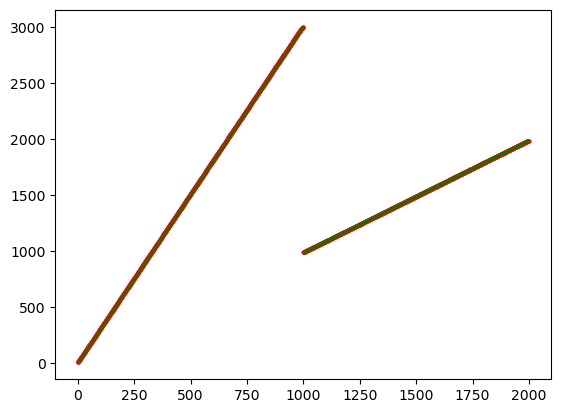

In [116]:
fig, ax = plt.subplots()
ax.scatter(df.x, df.pred, color='r', s=4, alpha=1)
ax.scatter(df.x, df.y, color='g', s=1, alpha=.2)

In [79]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 embedding_3 (Embedding)        (None, 1, 2)         6           ['input_16[0][0]']               
                                                                                                  
 input_15 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 flatten_3 (Flatten)            (None, 2)            0           ['embedding_3[0][0]']            
                                                                                            

In [30]:
inputA = Input(shape=(32,))
inputB = Input(shape=(128,))
print(inputA.shape)
print(inputB.shape)

# the first branch operates on the first input
x = Dense(32, activation="relu")(inputA)
x = Dense(16, activation="relu")(x)
#x = Model(inputs=inputA, outputs=x)
#print(x.output.shape)

# the second branch opreates on the second input
# y = GlobalAveragePooling1D()(inputB)
y = Embedding(input_dim=10, output_dim=10)(inputB)
y = Flatten()(inputB)
y = Dense(64, activation="relu")(y)
y = Dense(32, activation="relu")(y)
y = Dense(4, activation="relu")(y)
#y = Model(inputs=inputB, outputs=y)
#print(y.output.shape)

# combine the output of the two branches
combined = concatenate([x, y])
# apply a FC layer and then a regression prediction on the
# combined outputs
z = Dense(2, activation="relu")(combined)
z = Dense(1, activation="sigmoid")(z)
# our model will accept the inputs of the two branches and
# then output a single value
model = Model(inputs=[inputA, inputB], outputs=z)
print(model.input)
print(model.output.shape)

print(model.summary())

(None, 32)
(None, 128)
[<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'input_43')>, <KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'input_44')>]
(None, 1)
Model: "model_40"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_44 (InputLayer)          [(None, 128)]        0           []                               
                                                                                                  
 flatten_8 (Flatten)            (None, 128)          0           ['input_44[0][0]']               
                                                                                                  
 input_43 (InputLayer)          [(None, 32)]         0           []                               
                                                                                                  
 

In [2]:
x1 = np.asarray(range(0, 60))
x2 = np.linspace(0, 10, len(x1))[::-1]
y = x1*5+ x2*3+10
print(x1, y)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59] [ 40.          44.49152542  48.98305085  53.47457627  57.96610169
  62.45762712  66.94915254  71.44067797  75.93220339  80.42372881
  84.91525424  89.40677966  93.89830508  98.38983051 102.88135593
 107.37288136 111.86440678 116.3559322  120.84745763 125.33898305
 129.83050847 134.3220339  138.81355932 143.30508475 147.79661017
 152.28813559 156.77966102 161.27118644 165.76271186 170.25423729
 174.74576271 179.23728814 183.72881356 188.22033898 192.71186441
 197.20338983 201.69491525 206.18644068 210.6779661  215.16949153
 219.66101695 224.15254237 228.6440678  233.13559322 237.62711864
 242.11864407 246.61016949 251.10169492 255.59322034 260.08474576
 264.57627119 269.06779661 273.55932203 278.05084746 282.54237288
 287.03389831 291.52542373 296.01694915 300.50847458 305.        ]


In [3]:
np.c_[x1, x2, y][:10]

array([[ 0.        , 10.        , 40.        ],
       [ 1.        ,  9.83050847, 44.49152542],
       [ 2.        ,  9.66101695, 48.98305085],
       [ 3.        ,  9.49152542, 53.47457627],
       [ 4.        ,  9.3220339 , 57.96610169],
       [ 5.        ,  9.15254237, 62.45762712],
       [ 6.        ,  8.98305085, 66.94915254],
       [ 7.        ,  8.81355932, 71.44067797],
       [ 8.        ,  8.6440678 , 75.93220339],
       [ 9.        ,  8.47457627, 80.42372881]])

C:\Users\Wei\AppData\Local\Temp\ipykernel_12772\927111084.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


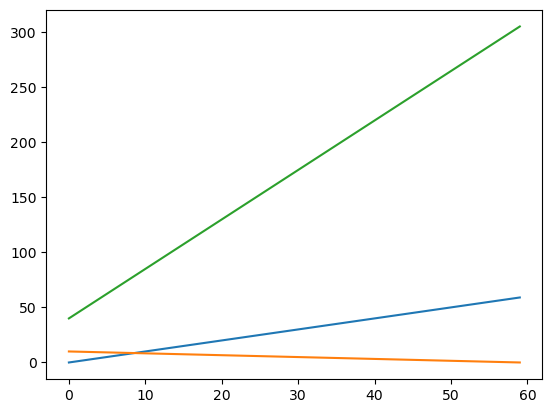

In [4]:
plt.close()
fig, ax = plt.subplots()
ax.plot(range(len(y)), x1)
ax.plot(range(len(y)), x2)
ax.plot(range(len(y)), y)
fig.show()

In [5]:
model = keras.Sequential([keras.layers.InputLayer(input_shape=(2, )), 
                          keras.layers.Dense(1)])

In [6]:
model.compile(loss='mse', optimizer='adam', metrics=['mape'])

In [7]:
model.fit(np.c_[x1, x2], y, epochs=1000, batch_size=10, verbose=1)

Epoch 1/1000
6/6 [==============================] - 0s 2ms/step - loss: 23754.8867 - mape: 88.0889
Epoch 2/1000
6/6 [==============================] - 0s 2ms/step - loss: 23686.1016 - mape: 87.9649
Epoch 3/1000
6/6 [==============================] - 0s 1ms/step - loss: 23616.3965 - mape: 87.8397
Epoch 4/1000
6/6 [==============================] - 0s 1ms/step - loss: 23546.9277 - mape: 87.7131
Epoch 5/1000
6/6 [==============================] - 0s 1ms/step - loss: 23479.3633 - mape: 87.5877
Epoch 6/1000
6/6 [==============================] - 0s 997us/step - loss: 23410.7910 - mape: 87.4612
Epoch 7/1000
6/6 [==============================] - 0s 2ms/step - loss: 23340.9805 - mape: 87.3357
Epoch 8/1000
6/6 [==============================] - 0s 1ms/step - loss: 23269.7520 - mape: 87.2127
Epoch 9/1000
6/6 [==============================] - 0s 1ms/step - loss: 23204.9492 - mape: 87.0873
Epoch 10/1000
6/6 [==============================] - 0s 1ms/step - loss: 23134.9121 - mape: 86.9621
Epoch 1

6/6 [==============================] - 0s 1ms/step - loss: 14332.8438 - mape: 68.8850
Epoch 164/1000
6/6 [==============================] - 0s 1ms/step - loss: 14284.0117 - mape: 68.7740
Epoch 165/1000
6/6 [==============================] - 0s 2ms/step - loss: 14236.9287 - mape: 68.6621
Epoch 166/1000
6/6 [==============================] - 0s 1ms/step - loss: 14189.4912 - mape: 68.5494
Epoch 167/1000
6/6 [==============================] - 0s 1ms/step - loss: 14142.1855 - mape: 68.4372
Epoch 168/1000
6/6 [==============================] - 0s 1ms/step - loss: 14091.9150 - mape: 68.3276
Epoch 169/1000
6/6 [==============================] - 0s 997us/step - loss: 14049.3408 - mape: 68.2145
Epoch 170/1000
6/6 [==============================] - 0s 1ms/step - loss: 13998.0566 - mape: 68.1038
Epoch 171/1000
6/6 [==============================] - 0s 997us/step - loss: 13952.5557 - mape: 67.9928
Epoch 172/1000
6/6 [==============================] - 0s 1ms/step - loss: 13903.4746 - mape: 67.8816
E

6/6 [==============================] - 0s 1ms/step - loss: 10799.9824 - mape: 60.0691
Epoch 245/1000
6/6 [==============================] - 0s 1ms/step - loss: 10762.8545 - mape: 59.9614
Epoch 246/1000
6/6 [==============================] - 0s 1ms/step - loss: 10721.9082 - mape: 59.8556
Epoch 247/1000
6/6 [==============================] - 0s 1ms/step - loss: 10683.4102 - mape: 59.7495
Epoch 248/1000
6/6 [==============================] - 0s 1ms/step - loss: 10643.3213 - mape: 59.6447
Epoch 249/1000
6/6 [==============================] - 0s 2ms/step - loss: 10605.4150 - mape: 59.5387
Epoch 250/1000
6/6 [==============================] - 0s 1ms/step - loss: 10564.9395 - mape: 59.4353
Epoch 251/1000
6/6 [==============================] - 0s 1ms/step - loss: 10528.7363 - mape: 59.3288
Epoch 252/1000
6/6 [==============================] - 0s 1ms/step - loss: 10488.3252 - mape: 59.2230
Epoch 253/1000
6/6 [==============================] - 0s 997us/step - loss: 10451.7451 - mape: 59.1164
Epo

6/6 [==============================] - 0s 1ms/step - loss: 5612.4399 - mape: 43.8559
Epoch 407/1000
6/6 [==============================] - 0s 1ms/step - loss: 5588.9019 - mape: 43.7621
Epoch 408/1000
6/6 [==============================] - 0s 1ms/step - loss: 5563.7515 - mape: 43.6670
Epoch 409/1000
6/6 [==============================] - 0s 1ms/step - loss: 5538.7651 - mape: 43.5729
Epoch 410/1000
6/6 [==============================] - 0s 1ms/step - loss: 5513.1763 - mape: 43.4788
Epoch 411/1000
6/6 [==============================] - 0s 973us/step - loss: 5488.9019 - mape: 43.3846
Epoch 412/1000
6/6 [==============================] - 0s 1ms/step - loss: 5462.8052 - mape: 43.2924
Epoch 413/1000
6/6 [==============================] - 0s 1ms/step - loss: 5439.3257 - mape: 43.1979
Epoch 414/1000
6/6 [==============================] - 0s 1ms/step - loss: 5414.2666 - mape: 43.1043
Epoch 415/1000
6/6 [==============================] - 0s 1ms/step - loss: 5390.3032 - mape: 43.0103
Epoch 416/100

6/6 [==============================] - 0s 1ms/step - loss: 2449.2634 - mape: 29.6112
Epoch 569/1000
6/6 [==============================] - 0s 1ms/step - loss: 2435.1350 - mape: 29.5307
Epoch 570/1000
6/6 [==============================] - 0s 2ms/step - loss: 2421.5491 - mape: 29.4489
Epoch 571/1000
6/6 [==============================] - 0s 1ms/step - loss: 2407.0005 - mape: 29.3673
Epoch 572/1000
6/6 [==============================] - 0s 1ms/step - loss: 2392.6794 - mape: 29.2863
Epoch 573/1000
6/6 [==============================] - 0s 1ms/step - loss: 2378.9541 - mape: 29.2049
Epoch 574/1000
6/6 [==============================] - 0s 1ms/step - loss: 2364.8499 - mape: 29.1236
Epoch 575/1000
6/6 [==============================] - 0s 1ms/step - loss: 2350.5493 - mape: 29.0436
Epoch 576/1000
6/6 [==============================] - 0s 1ms/step - loss: 2337.1218 - mape: 28.9626
Epoch 577/1000
6/6 [==============================] - 0s 1ms/step - loss: 2322.9495 - mape: 28.8819
Epoch 578/1000


6/6 [==============================] - 0s 1ms/step - loss: 797.4092 - mape: 17.6405
Epoch 732/1000
6/6 [==============================] - 0s 1ms/step - loss: 791.0964 - mape: 17.5758
Epoch 733/1000
6/6 [==============================] - 0s 1ms/step - loss: 784.7567 - mape: 17.5105
Epoch 734/1000
6/6 [==============================] - 0s 1ms/step - loss: 778.3906 - mape: 17.4452
Epoch 735/1000
6/6 [==============================] - 0s 1ms/step - loss: 771.7549 - mape: 17.3816
Epoch 736/1000
6/6 [==============================] - 0s 1ms/step - loss: 765.6475 - mape: 17.3172
Epoch 737/1000
6/6 [==============================] - 0s 1ms/step - loss: 759.3469 - mape: 17.2531
Epoch 738/1000
6/6 [==============================] - 0s 1ms/step - loss: 752.9910 - mape: 17.1897
Epoch 739/1000
6/6 [==============================] - 0s 1ms/step - loss: 747.0646 - mape: 17.1257
Epoch 740/1000
6/6 [==============================] - 0s 990us/step - loss: 740.8992 - mape: 17.0609
Epoch 741/1000
6/6 [===

Epoch 896/1000
6/6 [==============================] - 0s 1ms/step - loss: 156.6501 - mape: 8.6408
Epoch 897/1000
6/6 [==============================] - 0s 1ms/step - loss: 154.8988 - mape: 8.5975
Epoch 898/1000
6/6 [==============================] - 0s 2ms/step - loss: 153.0249 - mape: 8.5544
Epoch 899/1000
6/6 [==============================] - 0s 1ms/step - loss: 151.2717 - mape: 8.5110
Epoch 900/1000
6/6 [==============================] - 0s 2ms/step - loss: 149.4232 - mape: 8.4683
Epoch 901/1000
6/6 [==============================] - 0s 1ms/step - loss: 147.6895 - mape: 8.4249
Epoch 902/1000
6/6 [==============================] - 0s 1ms/step - loss: 145.9216 - mape: 8.3823
Epoch 903/1000
6/6 [==============================] - 0s 1ms/step - loss: 144.1707 - mape: 8.3391
Epoch 904/1000
6/6 [==============================] - 0s 992us/step - loss: 142.3907 - mape: 8.2970
Epoch 905/1000
6/6 [==============================] - 0s 1ms/step - loss: 140.6966 - mape: 8.2547
Epoch 906/1000
6/6

In [8]:
yhat = model.predict(np.c_[x1, x2]).flatten()

2/2 [==============================] - 0s 2ms/step


C:\Users\Wei\AppData\Local\Temp\ipykernel_12772\3528482585.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


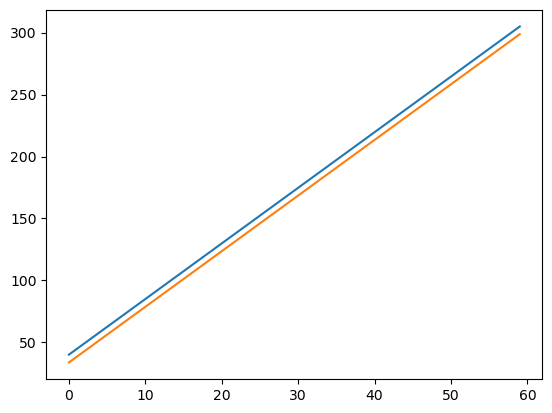

In [9]:
plt.close()
fig, ax = plt.subplots()
ax.plot(range(len(y)), y)
ax.plot(range(len(y)), yhat)
fig.show()